# Wine Quality Prediction with python
## Problem Statement
Consider that there is a wine manufacturing company and this comapny wants to create a new brand of wine lets say that you are an experienced data scientist and they want you to find thequality of the wine using several qualities like sugar content etc

In [4]:
# the label is quality of the wine
# We will train our machine learning model using this labeled dataset
# When we train a ml model with labeled dataset it is called superviced learning and when we use non labed dataset it is non superviced 


In [5]:
# dataset
# Data analysis like if there exist a relationship between variables,visualizations also
# data pre processing...we cannot read raw data to our machine learning model we have to do some processing so that it can be compatible with the data
# Train-test split...train data is used to train the model while test is used to evaluate our model...how good is it?
# Random forest model
# Trained Random forest model


In [6]:
# importing the dependencies
import numpy as np
import pandas as pd # used to create pandas dataframe
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [7]:
# Data collection
wine_dataset = pd.read_csv("winequalityN.csv")

In [8]:
# No of rows and cols
wine_dataset.shape

(6497, 13)

In [9]:
wine_dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
# Check if there are missing values in the dataset
wine_dataset.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [11]:
wine_dataset.dropna()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
wine=wine_dataset.dropna()

In [13]:
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Analysis and visualization


In [14]:
# statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


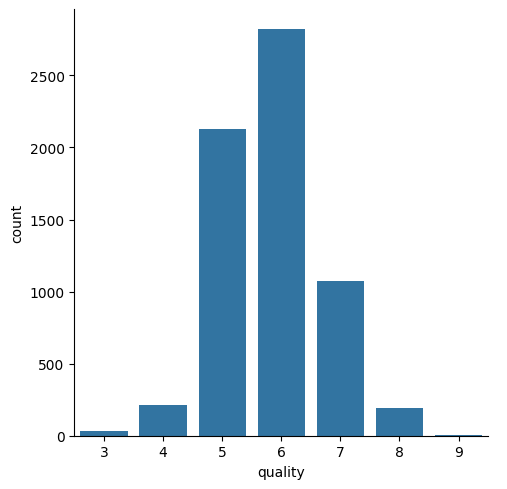

In [15]:
# numerical summary for no of values of each quality of wine
# We are using seaborn library
sns.catplot(x='quality',data=wine,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

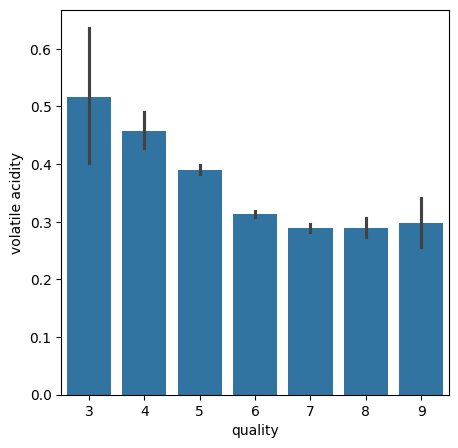

In [16]:
# some more analysis to see which variable correlate to quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data= wine)

<Axes: xlabel='quality', ylabel='citric acid'>

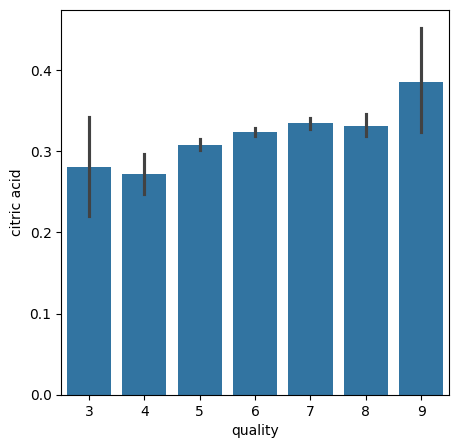

In [17]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data= wine)

In [18]:
# We can clearly see that if the citric acid is high then the wine is highquality
# If the volatile acidity is high the quality is low and vice versa


# Lets see the list of all columns
col_names=wine.columns
print (col_names)

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')


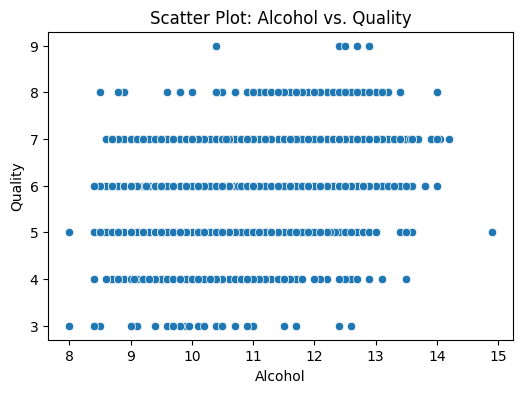

In [19]:
# Example: Scatter plot between 'alcohol' and 'quality'
plt.figure(figsize=(6, 4))
sns.scatterplot(x='alcohol', y='quality', data=wine)
plt.title("Scatter Plot: Alcohol vs. Quality")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.show()

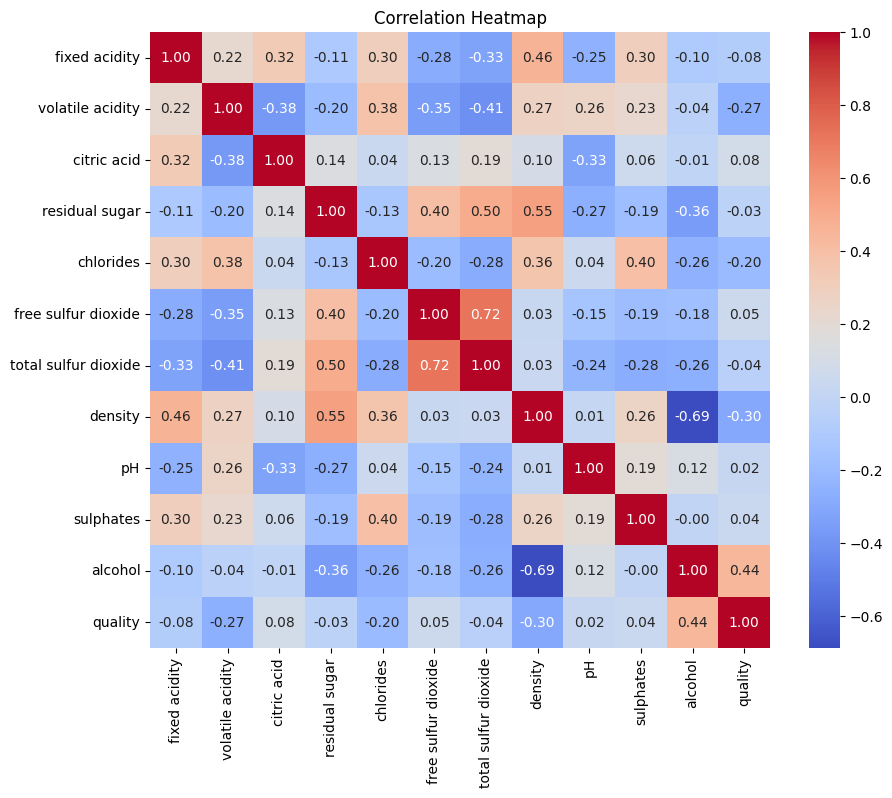

In [20]:
# Select only numeric columns from the DataFrame
numeric_columns = wine.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [21]:
# Exclude non-numeric columns from the DataFrame
numeric_columns = wine.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Get the correlation coefficients for 'quality' with other variables
quality_correlations = correlation_matrix['quality']

# Print the correlation coefficients
print("Correlation coefficients with 'quality':")
print(quality_correlations)


Correlation coefficients with 'quality':
fixed acidity          -0.076174
volatile acidity       -0.266677
citric acid             0.084926
residual sugar         -0.034654
chlorides              -0.200553
free sulfur dioxide     0.054924
total sulfur dioxide   -0.041598
density                -0.304447
pH                      0.018403
sulphates               0.039054
alcohol                 0.444637
quality                 1.000000
Name: quality, dtype: float64


## Correlation Coefficients

- Each value represents the strength and direction of the linear relationship between the corresponding independent variable and the "quality" of the wine.
- A positive coefficient indicates a positive correlation (as one variable increases, the other tends to increase).
- A negative coefficient indicates a negative correlation (as one variable increases, the other tends to decrease).
- A coefficient close to 0 suggests weak or no linear correlation#.

## Interpretation

1. **Alcohol (0.444637)**:
   - There is a moderate positive correlation between alcohol content and wine quality.
   - Higher alcohol content tends to be associated with better quality.

2. **Density (-0.304447)**:
   - There is a moderate negative correlation between density and quality.
   - Lower density (higher density means more sugar) is associated with better quality.

3. **Volatile Acidity (-0.266677)**:
   - There is a moderate negative correlation.
   - Higher volatile acidity tends to be associated with lower quality.

4. **Other variables**:
   - Other variables have weaker correlations with qual#ity (closer to 0).

## Considerations

- Correlation does not imply causation. These coefficients only measure linear relationships.
- Other factors (not included in this dataset) may also influence wine quality.
- Further analysis, such as regression modeling, can provide more insights.


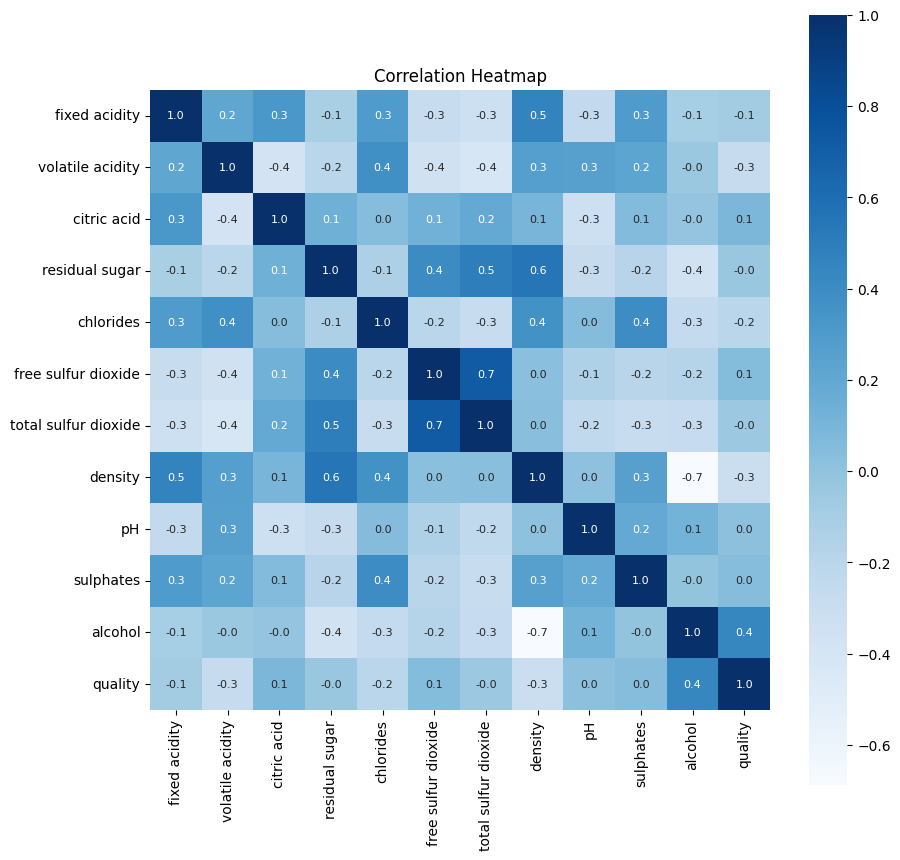

In [22]:
# Exclude non-numeric columns from the DataFrame
numeric_columns = wine.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()



In [23]:
# separating data and the labels

# separating data and the labels
x = wine.drop(['quality', 'type'], axis=1)



## Label BInalization

This means we want this values to be two only either good or bad instead of having those all...we want values less than 6 to be bad and those greater than 6 to be good

In [24]:
y = wine['quality'].apply(lambda y_values: 1 if y_values >=7 else 0)

# Train And Test Data

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [26]:
print(y.shape,y_train.shape,y_test.shape)

(6463,) (5170,) (1293,)


In [27]:
print(x_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2287            6.7             0.430         0.23             5.0      0.157   
6012            5.0             0.400         0.50             4.3      0.046   
2627            7.8             0.170         0.23             1.7      0.029   
5265           10.4             0.575         0.61             2.6      0.076   
5145            8.2             0.600         0.17             2.3      0.072   
...             ...               ...          ...             ...        ...   
2538            5.9             0.280         0.14             8.6      0.032   
6475            6.2             0.700         0.15             5.1      0.076   
3632            6.5             0.210         0.51            17.6      0.045   
5732            8.8             0.685         0.26             1.6      0.088   
2599            6.9             0.320         0.27            16.0      0.034   

      free sulfur dioxide  

## Model Training using Random Forest classifier

In [28]:
model= RandomForestClassifier

In [29]:
# Instantiate the RandomForestClassifier
model = RandomForestClassifier()

# Fit the model to the training data
model.fit(x_train, y_train)


RandomForestClassifier()

# Model Evaluation using Accuracy score

In [30]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [31]:
print('The Accuracy of the model is: ',test_data_accuracy*100)

The Accuracy of the model is:  88.94044856921887


## BUilding the predictive system

In [32]:
input_data = (5.2,0.44,0.04,1.4,0.036,43,119,0.9894,3.36,0.33,12.1)

# Changing the input data to numpy array
input_data_asnumpyarray=np.asarray(input_data)

## Reshape the data as we are predicting label for only one instance
input_data_reshaped = input_data_asnumpyarray.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)
if(prediction[0])==1:
    print('This is a good quality wine😊')
else:
    print('This is a poor quality wine😒')

[1]
This is a good quality wine😊


C:\Users\LENOVO\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [33]:
import pickle

In [37]:
filename='train3_model.sav'
pickle.dump(model,open(filename,'wb'),protocol=4)

# Loading the saved model
loaded_model=pickle.load(open('train3_model.sav','rb'))

In [38]:

import warnings
warnings.filterwarnings('ignore')
input_data = (7.3,0.28,0.43,1.7,0.08,21,123,0.9905,3.19,0.42,12.8)

# Changing the input data to numpy array
input_data_asnumpyarray=np.asarray(input_data)

## Reshape the data as we are predicting label for only one instance
input_data_reshaped = input_data_asnumpyarray.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)
if(prediction[0])==1:
    print('This is a good quality wine😊')
else:
    print('This is a poor quality wine😒')

[0]
This is a poor quality wine😒


In [36]:
importances = loaded_model.feature_importances_
print(importances)


[0.06788785 0.08782215 0.07675517 0.084461   0.08525339 0.07920181
 0.08472471 0.11506342 0.07532952 0.08102188 0.16247911]
